# Generating synthetic customer data

In this notebook, we will generate synthetic customer data using an LLM. For this we use JSON format. Eventually we will plot the data to see shortcomings of using LLMs for this..

Note: This notebook was AI-generated (and human curated) using an LLM as shown [here](https://github.com/haesleinhuepf/BioImageAnalysisNotebooks/issues/64).

In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openai
from tqdm import tqdm

In [2]:
# Reusing LLM utility functions from earlier exercise
import sys
sys.path.append("../20_chatbots/")
from llm_utilities import prompt_scadsai_llm, prompt_ollama, prompt_blablador, prompt_kisski
prompt = prompt_scadsai_llm

## Define the synthetic data generation function

We'll create a function that uses the LLM to generate customer data in JSON format.

In [3]:
def generate_customer() -> str:
    prompt_text = """Generate one realistic customer profile in valid JSON format with the following structure:
    {
        'name': str,
        'gender': str,
        'age': int,
        'income': float,
        'household_size': int,
        'grocery_list': [
            {'item': str, 'price': float},
            ...
        ]
    }
    Include 5-10 grocery items with realistic prices.
    
    Respond with the JSON data only and no markdown fences."""
    return prompt(prompt_text)

# Test the function
sample_data = generate_customer()
print(sample_data)

{
    "name": "Emily Wilson",
    "gender": "Female",
    "age": 32,
    "income": 85000.0,
    "household_size": 3,
    "grocery_list": [
        {"item": "Milk (gallon)", "price": 3.99},
        {"item": "Bread (loaf)", "price": 2.49},
        {"item": "Chicken breasts (5 lbs)", "price": 15.99},
        {"item": "Apples (5 count)", "price": 6.99},
        {"item": "Eggs (dozen)", "price": 2.29},
        {"item": "Quaker Oats (4 lbs)", "price": 8.99},
        {"item": "Ground beef (1 lb)", "price": 5.99},
        {"item": "Carrots (2 lbs)", "price": 1.99},
        {"item": "Almond milk (half-gallon)", "price": 3.49},
        {"item": "Peanut butter (26 oz)", "price": 7.99}
    ]
}


## Collect and validate customer records

We'll generate 10 customer records and validate the JSON format.

In [4]:
customer_records = []

for i in tqdm(range(100)):
    try:
        data = generate_customer()
        # Validate JSON
        customer_data = json.loads(data)
        customer_records.append(customer_data)
    except json.JSONDecodeError:
        print(f"Invalid JSON format in record {i+1}")

print(f"\nCollected {len(customer_records)} valid customer records")

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [36:45<00:00, 22.06s/it]


Collected 100 valid customer records


## Transform data into a DataFrame

We'll create two DataFrames:
1. Customer information
2. Calculate total weekly grocery spending

In [5]:
# Extract customer info
customer_info = []
for record in customer_records:
    try:
        # Calculate total spending
        total_spending = sum(item['price'] for item in record['grocery_list'])
        
        customer_info.append({
            'name': record['name'],
            'gender': record['gender'],
            'age': record['age'],
            'income': record['income'],
            'household_size': record['household_size'],
            'weekly_spending': total_spending
        })
    except:
        print("Error processing record")

df = pd.DataFrame(customer_info)
display(df)

,name,gender,age,income,household_size,weekly_spending
0,Emily Wilson,Female,32,55000.0,3,44.60
1,Emily Thompson,Female,32,55000.0,3,32.90
2,Emily Wilson,Female,32,85000.0,3,33.60
3,Emily Wilson,Female,32,55000.0,3,29.21
4,Emily Wilson,Female,32,55000.0,3,33.51
...,...,...,...,...,...,...
95,Emily Wilson,Female,32,58000.0,3,60.50
96,Emily Wilson,Female,32,75000.0,3,51.21
97,Emily Wilson,Female,37,85000.0,4,87.40
98,Emily Wilson,Female,32,55000.0,3,59.20


## Visualize relationships in the data

Let's create several plots to analyze relationships between variables:

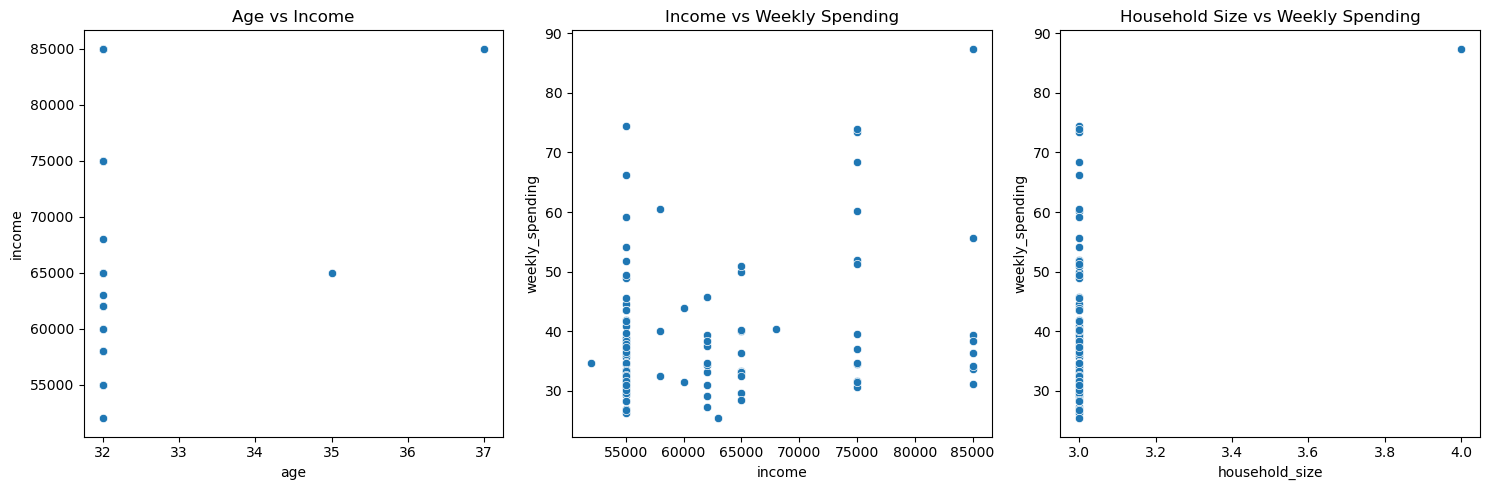

In [6]:
# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Age vs Income
sns.scatterplot(data=df, x='age', y='income', ax=ax1)
ax1.set_title('Age vs Income')

# Income vs Weekly Shopping
sns.scatterplot(data=df, x='income', y='weekly_spending', ax=ax2)
ax2.set_title('Income vs Weekly Spending')

# Household Size vs Weekly Shopping
sns.scatterplot(data=df, x='household_size', y='weekly_spending', ax=ax3)
ax3.set_title('Household Size vs Weekly Spending')

plt.tight_layout()
plt.show()

## Additional Analysis: Shopping patterns by gender

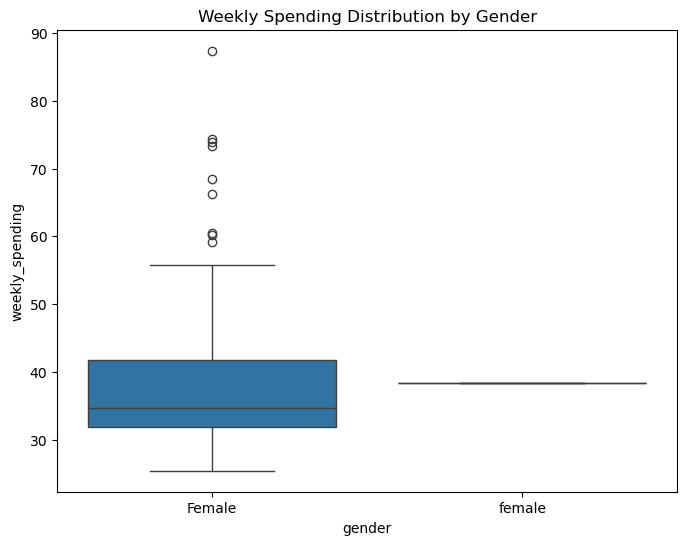

In [7]:
# Box plot of weekly spending by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='weekly_spending')
plt.title('Weekly Spending Distribution by Gender')
plt.show()

## Exercise
Modify the prompt to prevent multiple forms of "Male", "male" or "m" genders.